In [1]:
# load library 
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
config_file = 'C://Users//vamsi//Downloads//ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'C://Users//vamsi//Downloads//frozen_inference_graph.pb'

In [3]:
model=cv.dnn_DetectionModel(frozen_model,config_file)

In [4]:
# define the classes and i will provide you the file it will name as lable
classLables =[]# empty list of python
file_name='C://Users//vamsi//Downloads//labels.txt'
with open(file_name, 'rt') as fpt:
    classLables=fpt.read().rstrip('\n').split('\n')

In [5]:
print(len(classLables))

80


In [6]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
# define the config of for these object detection, its already predefine for mobile net you need to just write
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)#255/1=127.5
model.setInputMean((127.5, 127.5,127.5))#mobilenet=>[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000002427445A7D0>

In [8]:
# read the image
img= cv.imread('C://Users//vamsi//Downloads//7.jpg')

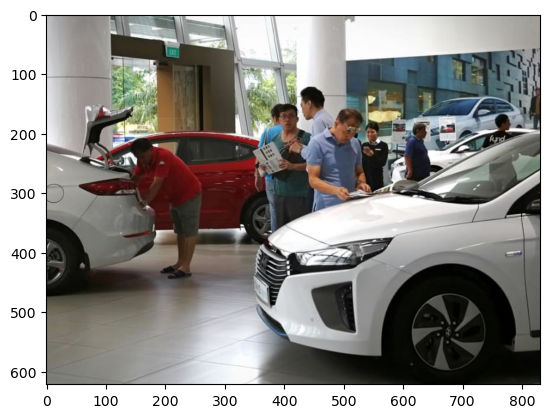

In [9]:
# change the color to original color
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [10]:
ClassIndex, confidece, bbox=model.detect(img, confThreshold=0.5)

In [11]:
# lets see which number have present  the object in the image among the 80 number of class 
print(ClassIndex)#(3 , 1), 1 means person and 3 means car lets have a look number 3 and 1 is this correct or not
# yes it is correct

[3 1 1 1 3 3 1 1 1 3 1 1]


In [12]:
# define the bounding box and format 
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness=1)
    cv.rectangle(img, boxes,(215, 0, 0), 2)
    cv.putText(img, classLables[ClassInd-1] , (boxes[0]+10,boxes[1]+40) , font, fontScale = font_scale, color = (0,255,0), thickness=3)

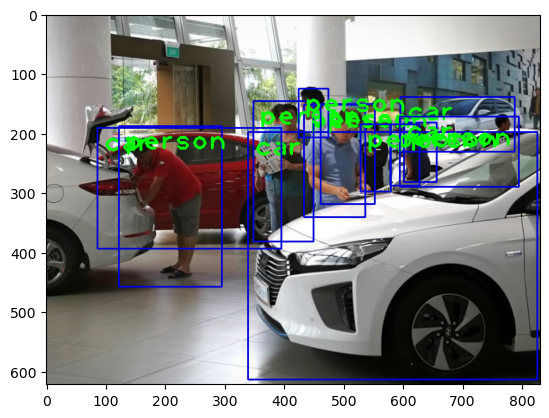

In [13]:
# lets show now 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))